Задание подготовлено Анастасией Щепанской 

# Задание: 

📚 Датасет: **Titanic** Dataset https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

🎯 Задание: 
1) Загрузите датасет “Титаник”

2) Проверьте наличие пропущенных значений и проанализируйте, в каких переменных они присутствуют.

3) Проведите анализ выживаемости по полу, возрасту, классу билета и другим факторам, которые кажутся интересными.

4) Разделите данные на признаки и целевую переменную, а затем на обучающую и тестовую выборки (80% на 20%).

5) Постройте модель дерева решений (DecisionTreeClassifier) для предсказания выживаемости пассажиров на основе признаков: пол, возраст, стоимость билета.

6) Оцените модель с помощью метрик: accuracy, precision, recall, F1-score. Постройте матрицу ошибок.


## Описание и  загрузка датасета

Набор данных **Titanic** охватывает пассажиров судна Titanic и сообщает нам, выжили ли они после его крушения.

Каждая строчка датасета содержит следующие признаки:


- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [412]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [413]:
# Загружаем датасет и смотрим
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)
titanic_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S


## Проверка наличия пропущенных значений

In [414]:
# Проверяем есть ли пропуски, какие типы данных
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [415]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Видно, что есть пропуски значений в колонках Age, Cabin, Embarked. 

In [416]:
# Проверка и  подсчет пропущенных значений:
missing_values = titanic_data.isnull().sum()
print(missing_values[missing_values > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


Признак Cabin содержит много пропусков.

In [417]:
# Смотрим статистические характеристики числовых признаков:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [418]:
# Смотрим статистические характеристики категориальных признаков:
titanic_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


В колонке Sex- 2 уникальных значения, в колонке Embarked - 3 уникальных значения.  

In [419]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Анализ выживаемости по признакам (полу, возрасту, классу билета и др.)

### Столбец Пол

Посмотрим, как влияет пол на выживаемость.

In [420]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

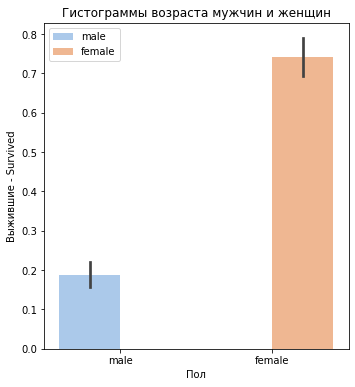

In [421]:
# Настройка графиков
plt.figure(figsize=(12, 6))

# Гистограммы
plt.subplot(1, 2, 1)
sns.set_palette("pastel")

sns.barplot(x='Sex', y='Survived', data=titanic_data, palette='pastel', hue= 'Sex')

plt.title('Гистограммы возраста мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Выжившие - Survived')
plt.legend()


### Столбец Возраст

Помним, что в этом признаке много пропусков. Заполним пропуски медианным значением Age.

In [422]:
median_age = titanic_data['Age'].median()

titanic_data['Age'].fillna(median_age, inplace=True)

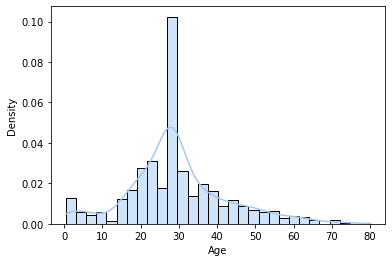

In [423]:
sns.histplot(titanic_data['Age'], bins=30, kde=True, fill=True, stat='density')
plt.show();

### Столбец Класс

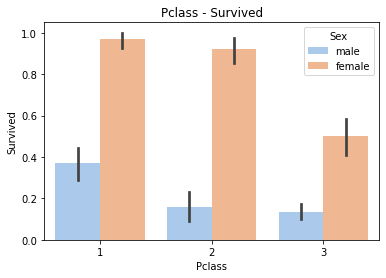

In [424]:
sns.barplot(x='Pclass', y='Survived', data=titanic_data, palette='pastel', hue= 'Sex')
plt.title('Pclass - Survived')
plt.show();

### Другие столбцы

In [425]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


 
Столбец PassengerId является категориальным и не несёт важной информации.

Столбцы Ticket, Name и Cabin не будем брать в рассмотрение.

In [426]:
# Признак Sex является категориальным, то есть содержит нечисловые значения. 
# Для работы большинства алгоритмов необходимо переводить категории в числа.
# Закодируем признак Sex (male - 1, female - 0).
titanic_data['Sex'] = titanic_data['Sex'].map({'male' : 1, 'female' : 0})

In [427]:
# Удалим лишние столбцы 'PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'
data_clean = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
data_clean.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


### Исследование признаков

Построим матрицу корреляции между признаками.

In [428]:
import seaborn as sb

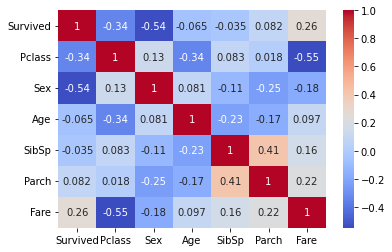

In [429]:
corr = data_clean.corr()
sb.heatmap(corr, cmap="coolwarm", annot=True);

Значения в ячейках показывают степень корреляции между различными признаками. Значения варьируются от -1 до 1:

- 1 указывает на полную положительную корреляцию (когда один признак увеличивается, другой также увеличивается).
- -1 указывает на полную отрицательную корреляцию (когда один признак увеличивается, другой уменьшается).
- 0 указывает на отсутствие корреляции.

Видим, что сильная корреляция, связанная с выживаемостью, есть от 'Sex', 'Pclass'.

Есть корреляция, между ценой 'Pclass' и 'Fare', составом семьи 'Parch' и 'SibSp'.

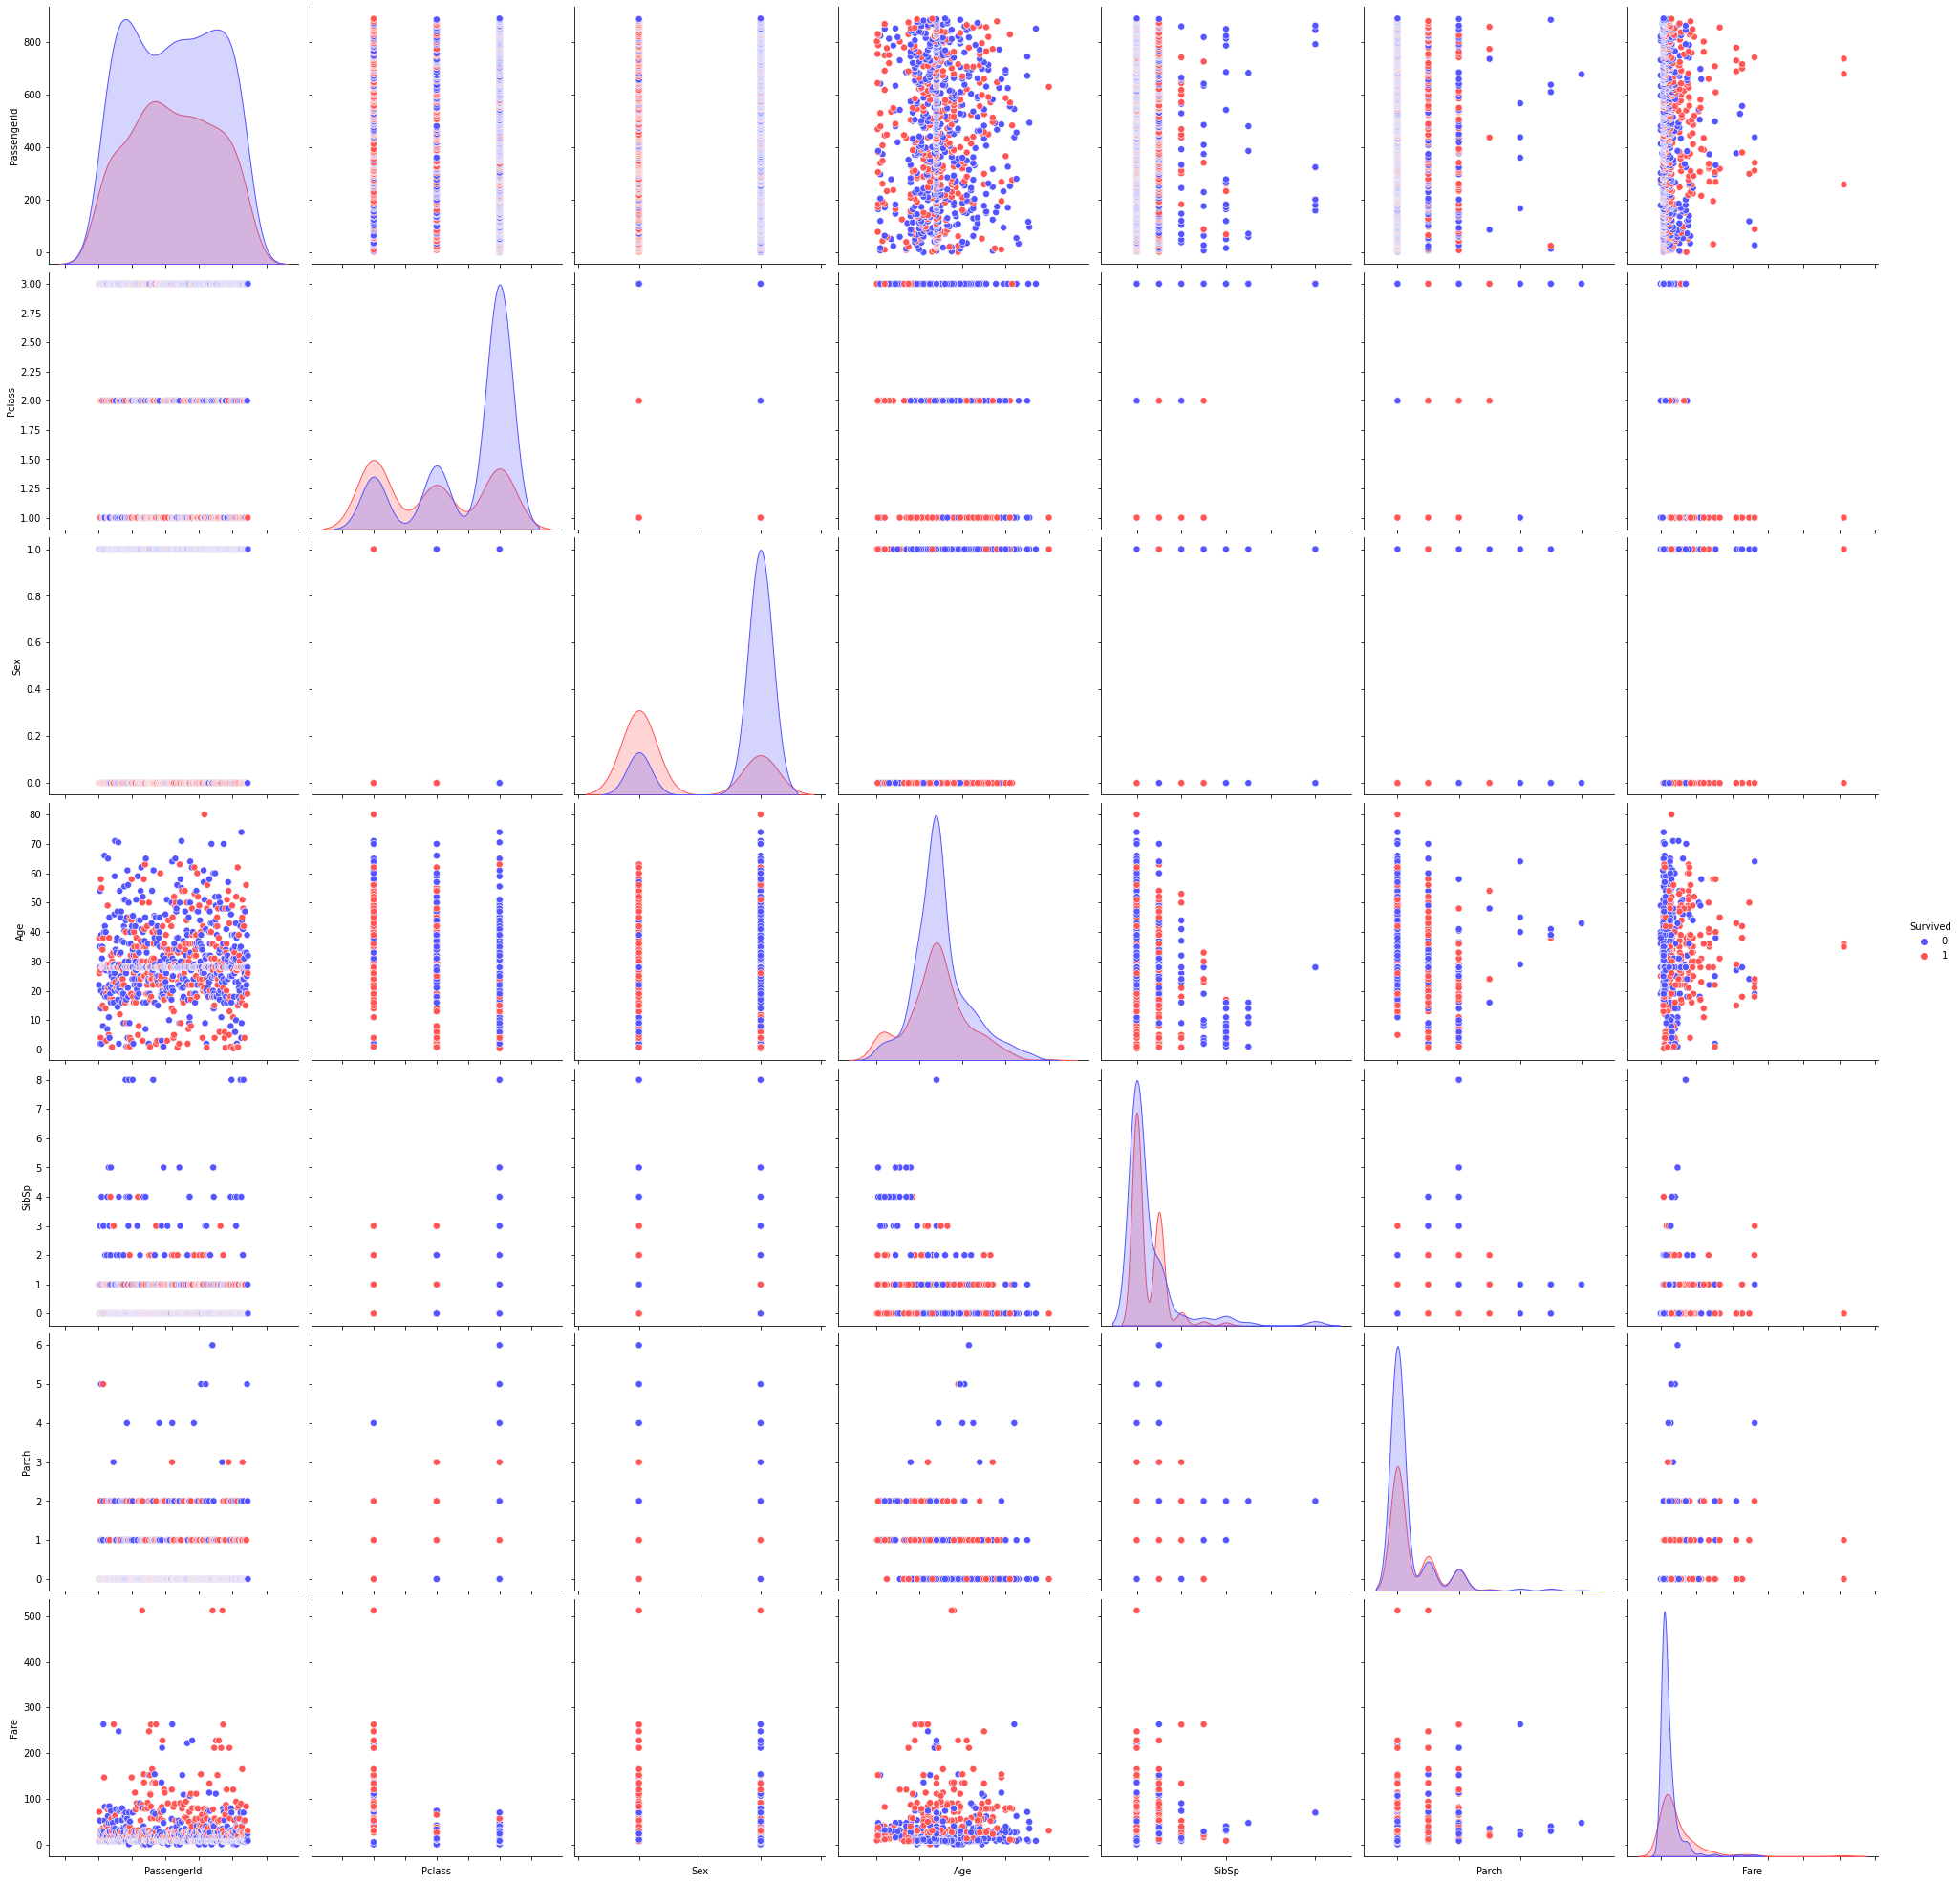

In [430]:
# Посмотрим на попарные зависимости некоторых признаков.
g = sns.pairplot(titanic_data, hue='Survived', palette = 'seismic', height=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[]);

## Деление данных

In [431]:
from sklearn.model_selection import train_test_split

# Признаки и целевая переменная
# Поскольку признак 'Pclass' достаточно сильно связан с признаком 'Fare', булем использовать в модели 'Pclass'
X = titanic_data[['Sex', 'Age','Fare']] #'Fare', 'Pclass'

y = titanic_data['Survived']  # target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Построение модели дерева решений и оценка результатов

In [432]:
from sklearn.tree import DecisionTreeClassifier

# Построение модели
model = DecisionTreeClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)


## Оценка модели

Оценка модели с помощью метрик: accuracy, precision, recall, F1-score. Построение матрицы ошибок.

In [433]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.4}')
print(f'Precision: {precision:.4}')
print(f'Recall: {recall:.4}')
print(f'F1 Score: {f1:.4}')
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.6983
Precision: 0.6429
Recall: 0.6081
F1 Score: 0.625
Confusion Matrix:
 [[80 25]
 [29 45]]


Кросс валидация

In [434]:
from sklearn.model_selection import cross_val_score

# Выполняем кросс-валидацию
cv_scores = cross_val_score(model, X_train, y_train, cv=4)  # , scoring='f1'
print("Cross-validation scores:", np.round(cv_scores, 4))
print("Mean CV score:", np.round(cv_scores.mean(), 4))

Cross-validation scores: [0.7303 0.7247 0.764  0.7697]
Mean CV score: 0.7472


## Улучшение модели

Поскольку признак 'Pclass' достаточно сильно связан с признаком 'Fare', булем использовать в модели 'Pclass'.

In [435]:
X = titanic_data[['Sex', 'Age','Pclass']] 

y = titanic_data['Survived']  # target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [436]:
# Построение модели
model_2 = DecisionTreeClassifier(random_state=42) 

# Обучение модели
model_2.fit(X_train, y_train)

# Предсказание
y_pred_2 = model_2.predict(X_test)


In [437]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_2)
precision = precision_score(y_test, y_pred_2)
recall = recall_score(y_test, y_pred_2)
f1 = f1_score(y_test, y_pred_2)
conf_matrix = confusion_matrix(y_test, y_pred_2)
print(f'Accuracy: {accuracy:.4}')
print(f'Precision: {precision:.4}')
print(f'Recall: {recall:.4}')
print(f'F1 Score: {f1:.4}')
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.7765
Precision: 0.7576
Recall: 0.6757
F1 Score: 0.7143
Confusion Matrix:
 [[89 16]
 [24 50]]


Accuracy (Точность): 0.7765 — это доля правильно предсказанных наблюдений.

Precision (Точность): 0.7576 — это доля истинных положительных результатов среди всех положительных предсказаний.

Recall (Полнота): 0.6757 — это доля истинных положительных результатов среди всех фактических положительных случаев.

F1 Score: 0.7143 — это гармоническое среднее между точностью и полнотой, которое учитывает оба аспекта.

Confusion Matrix (Матрица ошибок):

[[89 16]

[24 50]]

Это означает, что:
- 89 истинно отрицательных (правильно предсказанные невыжившие)
- 16 ложных положительных (невыжившие, ошибочно предсказанные как выжившие)
- 24 ложных отрицательных (выжившие, ошибочно предсказанные как невыжившие)
- 50 истинно положительных (правильно предсказанные выжившие)

Кросс-валидация

In [438]:
from sklearn.model_selection import cross_val_score

# Выполняем кросс-валидацию
cv_scores = cross_val_score(model_2, X_train, y_train, cv=4)  # , scoring='f1'
print("Cross-validation scores:", np.round(cv_scores, 4))
print("Mean CV score:", np.round(cv_scores.mean(), 4))

Cross-validation scores: [0.7697 0.8202 0.7584 0.7921]
Mean CV score: 0.7851


Кросс-валидация показывает, что модель имеет стабильные результаты с небольшими колебаниями между разными фолдами.
Средний балл кросс-валидации 0.7851 указывает на то, что модель в целом хорошо справляется с задачей классификации.